### Import all the necessary libraries

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### Set Matplotlib defaults

In [2]:
# Set Matplotlib defaults
plt.style.use("seaborn-v0_8-whitegrid")  # Updated style
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

### Set the working directory and read the dataset

In [3]:
# Set working directory
os.chdir(r'/C:\Users\mnmhy\IntelliJprojects\DAI5\Resources')

missing_values = ['n/a', 'na', 'nan', 'N/A', 'NA', 'NaN', 'NAN', '--', 'Missing']
df = pd.read_csv('cleaned_employees.csv', na_values=missing_values, sep=',', decimal='.')

pd.set_option('display.max_columns', None)  # to see all the columns
print(df.head())
print(df.info())

   EmpID  Gender  Age MaritalStatus        JobLevel  Experience       Dept  \
0      6    Male   32       Married             Mid           7         IT   
1     11  Female   34       Married             Mid          12    Finance   
2     33  Female   23        Single  Intern/Fresher           1  Marketing   
3     20  Female   29       Married          Junior           6         IT   
4     28   Other   23        Single          Junior           1      Sales   

     EmpType  PhysicalActivityHours  Workload  Stress  SleepHours  \
0  Full-Time                    2.5         2       1         7.6   
1  Full-Time                    1.8         2       2         7.9   
2  Full-Time                    2.1         5       4         6.5   
3   Contract                    1.9         3       1         7.5   
4  Part-Time                    3.7         2       1         4.9   

        CommuteMode  CommuteDistance  TeamSize  NumReports  haveOT  \
0               Car               20        12

### Define the features and the target

In [5]:
# Define all features and target
features =["Gender", "Age", "MaritalStatus", "JobLevel", "Experience", "Dept", "EmpType", "PhysicalActivityHours", "Workload", "Stress",  "SleepHours", "CommuteMode", "CommuteDistance", "TeamSize", "NumReports", "haveOT", "TrainingHoursPerYear"]

target = "JobSatisfaction"

# Extract X and y
X = df[features]  # Features
y = df[target]    # Target variable

After analyzing the target variable, we decided to choose regression instead of classification, because the satisfaction level is an ordinal variable.

### Calculate the Mutual Information Scores to see the correlation between the target and the features

Mutual Information Scores:
Workload                 0.065878
SleepHours               0.050530
Age                      0.035232
Stress                   0.027575
haveOT                   0.018576
JobLevel                 0.015999
Experience               0.012244
Gender                   0.011651
MaritalStatus            0.007034
Dept                     0.005977
EmpType                  0.004662
PhysicalActivityHours    0.000000
CommuteMode              0.000000
CommuteDistance          0.000000
TeamSize                 0.000000
NumReports               0.000000
TrainingHoursPerYear     0.000000
Name: MI Scores, dtype: float64


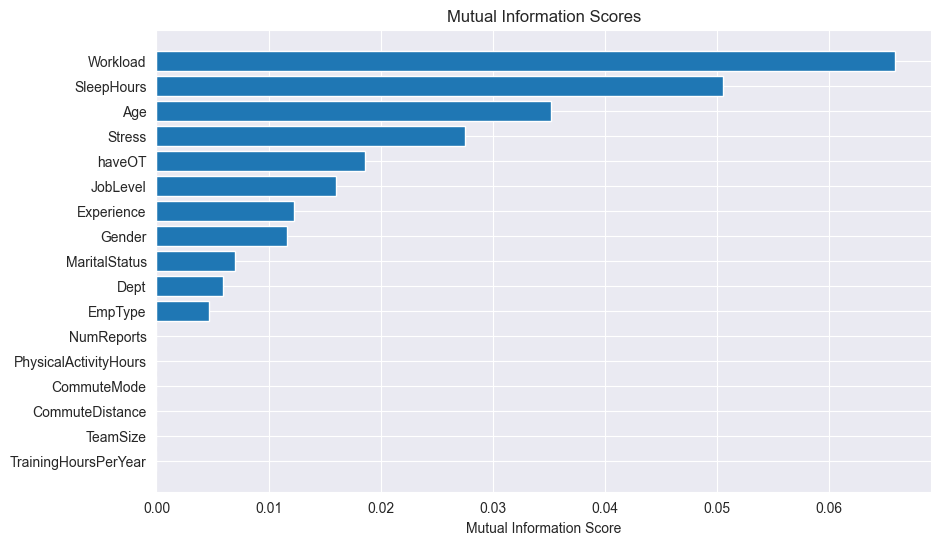

In [6]:
# Utility function to calculate Mutual Information scores
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()  # Factorize categorical variables
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

# Utility function to plot Mutual Information scores
def plot_mi_scores(scores):
    plt.figure(figsize=(10, 6))  # Specify figure size for better visibility
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    plt.xlabel("Mutual Information Score")  # Add label for x-axis
    plt.show()  # Show the plot

# Calculate MI scores and plot
mi_scores = make_mi_scores(X, y)  # Calculate MI scores
print("Mutual Information Scores:")
print(mi_scores)  # Print MI scores for review
plot_mi_scores(mi_scores)           # Plot MI scores

According to the Mutual Information Score graph, we decided to stick to the top 4 features in our analysis, as the dependency between them and the target variable is the biggest.

### Correlation map for the top 4 features

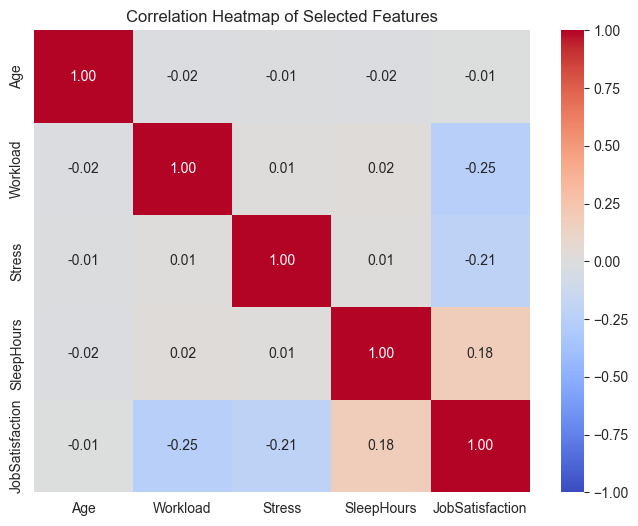

In [9]:
features =[ "Age", "Workload", "Stress",  "SleepHours", "JobSatisfaction"]

corr_matrix = df[features].corr()

# plot the heatmap for the specified columns
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title("Correlation Heatmap of Selected Features")
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure for plotting
plt.figure(figsize=(18, 6))

# Plot histogram for workload
plt.subplot(1, 3, 1)
sns.histplot(df['Workload'], color='blue', kde=False)  # Simple histogram
plt.title('Workload Distribution', fontsize=14)
plt.xlabel('Workload', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Plot histogram for sleep hours
plt.subplot(1, 3, 2)
sns.histplot(df['SleepHours'], color='green', kde=False)
plt.title('Sleep Hours Distribution', fontsize=14)
plt.xlabel('Sleep Hours', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Plot histogram for stress
plt.subplot(1, 3, 3)
sns.histplot(df['Stress'], color='red', kde=False)
plt.title('Stress Distribution', fontsize=14)
plt.xlabel('Stress', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Standard scaling the relevant features
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[['Workload', 'SleepHours', 'Stress', 'JobSatisfaction']] = scaler.fit_transform(df[['Workload', 'SleepHours', 'Stress', 'JobSatisfaction']])


In [ ]:
# Line plots for each feature vs Job Satisfaction
plt.figure(figsize=(18, 6))

# Line plot for Workload vs Job Satisfaction
plt.subplot(1, 3, 1)
sns.lineplot(x=df_scaled['Workload'], y=df_scaled['JobSatisfaction'], color='blue')
plt.title('Workload vs Job Satisfaction (Scaled)', fontsize=14)
plt.xlabel('Workload (Standard Scaled)', fontsize=12)
plt.ylabel('Job Satisfaction (Standard Scaled)', fontsize=12)

# Line plot for Sleep Hours vs Job Satisfaction
plt.subplot(1, 3, 2)
sns.lineplot(x=df_scaled['SleepHours'], y=df_scaled['JobSatisfaction'], color='green')
plt.title('Sleep Hours vs Job Satisfaction (Scaled)', fontsize=14)
plt.xlabel('Sleep Hours (Standard Scaled)', fontsize=12)
plt.ylabel('Job Satisfaction (Standard Scaled)', fontsize=12)

# Line plot for Stress vs Job Satisfaction
plt.subplot(1, 3, 3)
sns.lineplot(x=df_scaled['Stress'], y=df_scaled['JobSatisfaction'], color='red')
plt.title('Stress vs Job Satisfaction (Scaled)', fontsize=14)
plt.xlabel('Stress (Standard Scaled)', fontsize=12)
plt.ylabel('Job Satisfaction (Standard Scaled)', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


In [12]:
print("Unique value of workload:",  df['Workload'].unique())
print("Unique value of age: ", df['Age'].unique())
print("Unique value of stress: ", df['Stress'].unique())
print("Unique value of sleep hours: ", df['SleepHours'].unique())
print("Unique value of experience: ", df['Experience'].unique())
print("Unique value of haveOT: ", df['haveOT'].unique())
print("Unique value of empType: ", df['EmpType'].unique())
print("Unique value of JobLevel: ", df['JobLevel'].unique())

Unique value of workload: [2 5 3 4 1]
Unique value of age:  [32 34 23 29 33 26 24 40 30 35 28 45 27 31 49 56 48 22 25 37 38 43 36 47
 39 42 58 46 44 54 41 52 51 53 59 50 60 55 57]
Unique value of stress:  [1 2 4 3 5]
Unique value of sleep hours:  [7.6 7.9 6.5 7.5 4.9 6.2 5.8 5.7 8.2 8.5 6.3 6.8 8.1 8.3 7.8 5.9 8.  8.9
 7.2 8.7 9.  5.4 9.5 7.4 7.3 7.1 6.9 9.7 9.4 8.8 6.4 9.3 7.7 6.7 6.6 8.6
 8.4 6.1 6.  7.  5.6 5.5 5.2 5.3 4.7 4.6 5.  4.8 5.1 9.1 9.2 9.8 4.5 9.6
 4.4 4.3]
Unique value of experience:  [ 7 12  1  6 10  4  2 14  8  9 23 18  5 26  0  3 11 25 13 17 15 16 21 19
 24 20 22 27 29 28]
Unique value of haveOT:  [ True False]
Unique value of empType:  ['Full-Time' 'Contract' 'Part-Time']
Unique value of JobLevel:  ['Mid' 'Intern/Fresher' 'Junior' 'Senior' 'Lead']


### Chi squared

In [7]:
import pandas as pd

# Assuming your DataFrame is already loaded as df
# df = pd.read_csv('your_dataset.csv')  # Uncomment this line if you still need to load the dataset

# 1. Convert JobSatisfaction to meaningful labels
job_satisfaction_mapping = {
    1: 'Not Satisfied',
    2: 'Not Quite Satisfied',
    3: 'Sorta Satisfied',
    4: 'Quite Satisfied',
    5: 'Satisfied'
}

df['JobSatisfaction'] = df['JobSatisfaction'].map(job_satisfaction_mapping)

# 2. Bin the numerical columns
# Example bins for demonstration; adjust as necessary
workload_bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Modify as needed
sleep_hours_bins = [0, 4, 6, 8, 10, 12]  # Modify as needed
age_bins = [18, 25, 30, 35, 40, 45, 50, 55, 60]  # Modify as needed
stress_bins = [0, 1, 2, 3, 4, 5]  # Modify as needed
experience_bins = [0, 2, 5, 10, 15, 20]  # Modify as needed

# Create new binned columns
df['Workload_Binned'] = pd.cut(df['Workload'], bins=workload_bins, labels=range(len(workload_bins)-1), include_lowest=True)
df['SleepHours_Binned'] = pd.cut(df['SleepHours'], bins=sleep_hours_bins, labels=range(len(sleep_hours_bins)-1), include_lowest=True)
df['Age_Binned'] = pd.cut(df['Age'], bins=age_bins, labels=range(len(age_bins)-1), include_lowest=True)
df['Stress_Binned'] = pd.cut(df['Stress'], bins=stress_bins, labels=range(len(stress_bins)-1), include_lowest=True)
df['Experience_Binned'] = pd.cut(df['Experience'], bins=experience_bins, labels=range(len(experience_bins)-1), include_lowest=True)

# Optionally drop the original numerical columns if needed
# df.drop(columns=['Workload', 'SleepHours', 'Age', 'Stress', 'Experience'], inplace=True)

# Print the updated DataFrame and its data types
print(df[['JobSatisfaction', 'Workload_Binned', 'SleepHours_Binned', 'Age_Binned', 'Stress_Binned', 'Experience_Binned']].head())
print(df.dtypes)


  JobSatisfaction Workload_Binned SleepHours_Binned Age_Binned Stress_Binned  \
0       Satisfied               1                 2          2             0   
1       Satisfied               1                 2          2             1   
2       Satisfied               4                 2          0             3   
3       Satisfied               2                 2          1             0   
4       Satisfied               1                 1          0             0   

  Experience_Binned  
0                 2  
1                 3  
2                 0  
3                 2  
4                 0  
EmpID                       int64
Gender                   category
Age                      category
MaritalStatus              object
JobLevel                 category
Experience               category
Dept                       object
EmpType                    object
PhysicalActivityHours     float64
Workload                 category
Stress                   category
SleepHours   

Feature: Workload_Binned
Chi-Squared Value: 264.6719
P-Value: 0.0000
Degrees of Freedom: 16
Expected Frequencies:
 [[ 55.85700033  55.76587961  55.2191553   56.31260392  50.84536082]
 [ 83.98935816  83.85234453  83.03026272  84.67442634  76.45360825]
 [253.19122049 252.77818424 250.29996674 255.25640173 230.4742268 ]
 [104.78284004 104.61190555 103.58629864 105.63751247  95.3814433 ]
 [115.17958098 114.99168607 113.86431659 116.11905554 104.84536082]]



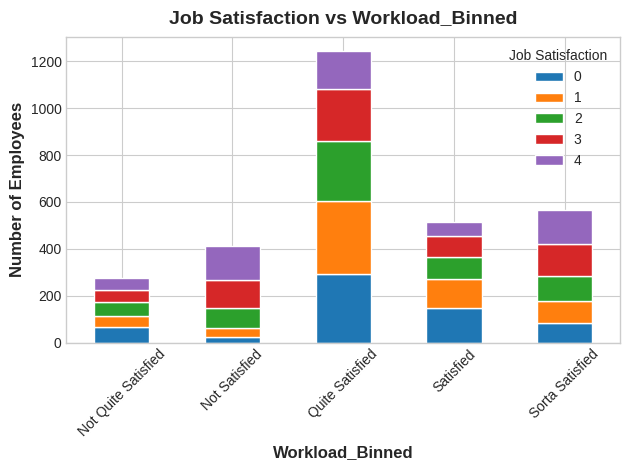

Feature: SleepHours_Binned
Chi-Squared Value: 111.8987
P-Value: 0.0000
Degrees of Freedom: 8
Expected Frequencies:
 [[ 44.28466911 188.25540406  41.45992684]
 [ 66.58862654 283.0701696   62.34120386]
 [200.73561689 853.33288992 187.93149318]
 [ 83.07416029 353.15064849  77.77519122]
 [ 91.31692717 388.19088793  85.4921849 ]]



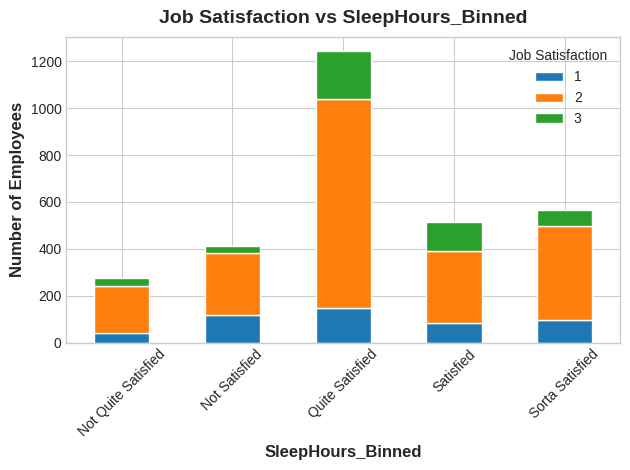

Feature: Age_Binned
Chi-Squared Value: 25.1188
P-Value: 0.6214
Degrees of Freedom: 28
Expected Frequencies:
 [[ 53.85234453  47.29165281  47.83837712  47.83837712  21.23112737
   24.23811107  21.04888593  10.66112404]
 [ 80.9750582   71.11007649  71.9321583   71.9321583   31.92417692
   36.44562687  31.65014965  16.03059528]
 [244.10442301 214.3658131  216.8440306  216.8440306   96.23744596
  109.86764217  95.41137346  48.3252411 ]
 [101.02228134  88.71499834  89.74060525  89.74060525  39.82773528
   45.46857333  39.48586631  19.99933489]
 [111.04589292  97.51745926  98.64482873  98.64482873  43.77951447
   49.98004656  43.40372464  21.98370469]]



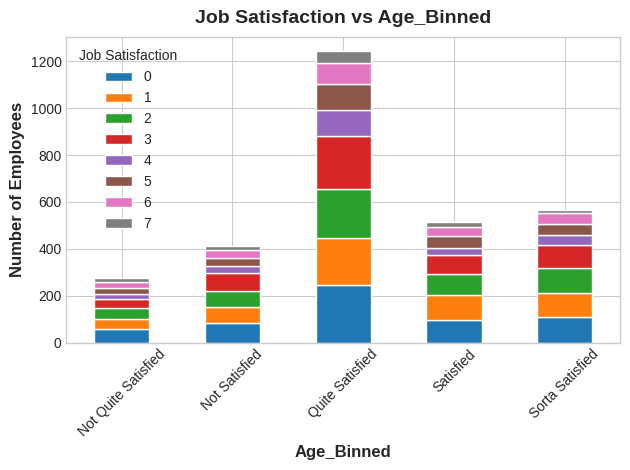

Feature: Stress_Binned
Chi-Squared Value: 195.7774
P-Value: 0.0000
Degrees of Freedom: 16
Expected Frequencies:
 [[164.01729298  48.38510143  38.36182241  16.31060858   6.92517459]
 [246.62454273  72.75424011  57.68274027  24.52544064  10.41303625]
 [743.46524776 219.32224809 173.88826072  73.93348853  31.39075491]
 [307.68207516  90.76621217  71.96341869  30.59727303  12.99102095]
 [338.21084137  99.7721982   79.1037579   33.63318923  14.2800133 ]]



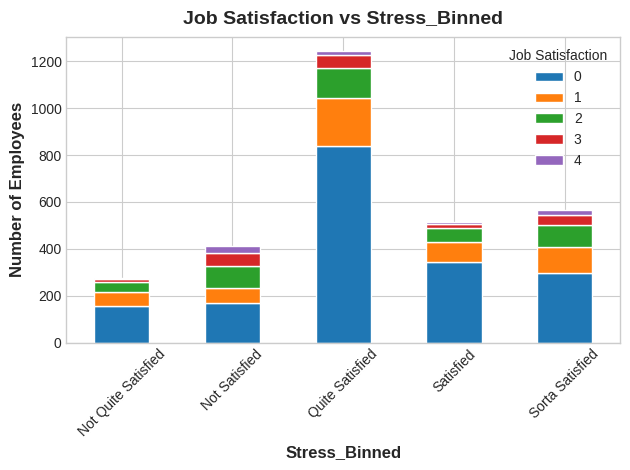

Feature: Experience_Binned
Chi-Squared Value: 15.7893
P-Value: 0.4678
Degrees of Freedom: 16
Expected Frequencies:
 [[ 59.6619256   45.67724289  65.74617068  49.9452954   27.96936543]
 [ 90.09190372  68.97447119  99.27935813  75.4194019   42.23486506]
 [270.51531729 207.10685631 298.10211524 226.4587892  126.81692195]
 [113.33369803  86.76841721 124.8913202   94.87600292  53.13056163]
 [123.39715536  94.4730124  135.98103574 103.30051058  57.84828592]]



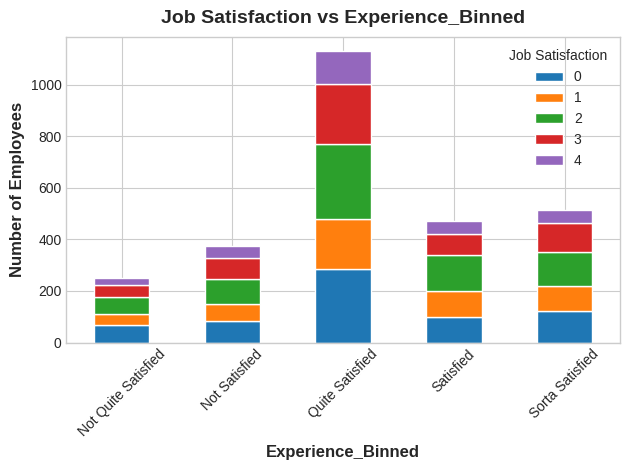

Feature: JobLevel
Chi-Squared Value: 14.6773
P-Value: 0.5484
Degrees of Freedom: 16
Expected Frequencies:
 [[ 18.4063851   54.85467243  34.62587296  69.34286664  96.77020286]
 [ 27.67675424  82.48220818  52.06518124 104.26737612 145.50848021]
 [ 83.43332225 248.64782175 156.95377453 314.3205853  438.64449618]
 [ 34.52876621 102.90256069  64.95510476 130.081144   181.53242434]
 [ 37.9547722  113.11273695  71.40006651 142.98802793 199.54439641]]



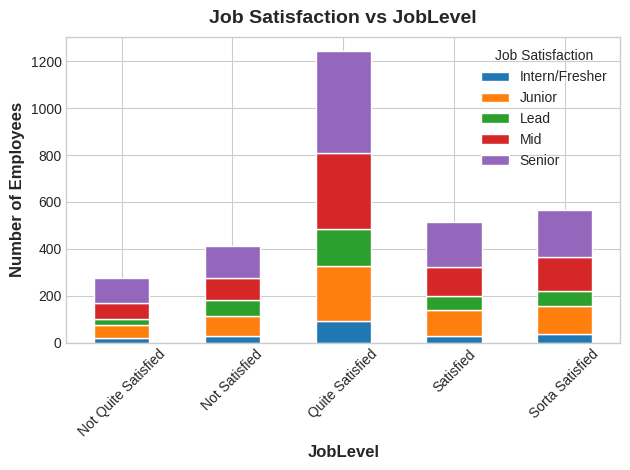

Feature: Gender
Chi-Squared Value: 5.1930
P-Value: 0.7368
Degrees of Freedom: 8
Expected Frequencies:
 [[112.35184569 138.32125042  23.32690389]
 [168.93781177 207.98669771  35.07549052]
 [509.27369471 626.98902561 105.73727968]
 [210.76222148 259.47855005  43.75922847]
 [231.67442634 285.22447622  48.10109744]]



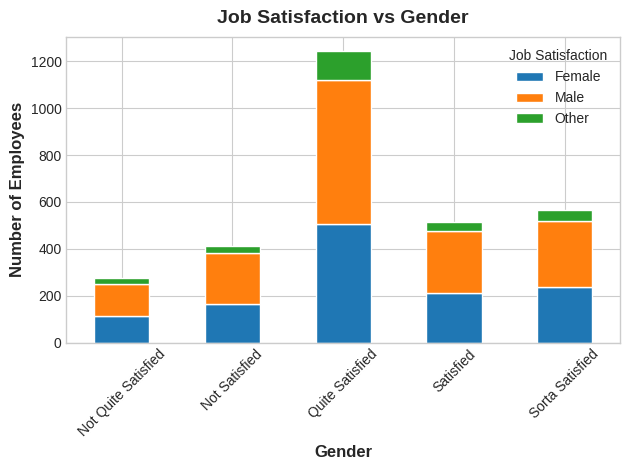

Feature: MaritalStatus
Chi-Squared Value: 13.2753
P-Value: 0.3494
Degrees of Freedom: 12
Expected Frequencies:
 [[1.71306950e+01 1.26111074e+02 1.30575989e+02 1.82241437e-01]
 [2.57585634e+01 1.89626871e+02 1.96340539e+02 2.74027270e-01]
 [7.76508148e+01 5.71642168e+02 5.91880944e+02 8.26072498e-01]
 [3.21356834e+01 2.36573329e+02 2.44949119e+02 3.41868972e-01]
 [3.53242434e+01 2.60046558e+02 2.69253409e+02 3.75789824e-01]]



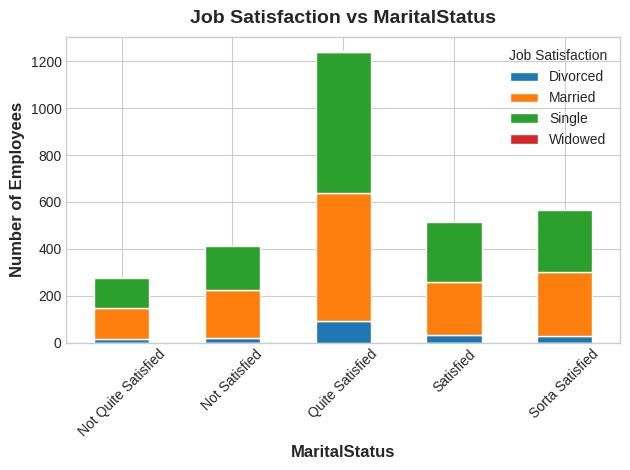

Feature: Dept
Chi-Squared Value: 38.6046
P-Value: 0.0875
Degrees of Freedom: 28
Expected Frequencies:
 [[ 13.39474559  57.40605254  12.939142    70.25407383  24.51147323
   28.61190555  41.2776854   25.60492185]
 [ 20.14100432  86.31858996  19.45593615 105.63751247  36.85666778
   43.02228134  62.06717659  38.50083139]
 [ 60.71632857 260.21283671  58.65114732 318.45094779 111.10675091
  129.69338211 187.10542069 116.0631859 ]
 [ 25.12736947 107.68872631  24.27269704 131.79048886  45.98137679
   53.67342867  77.43332225  48.03259062]
 [ 27.62055205 118.37379448  26.68107749 144.86697705  50.54373129
   58.99900233  85.11639508  52.79847024]]



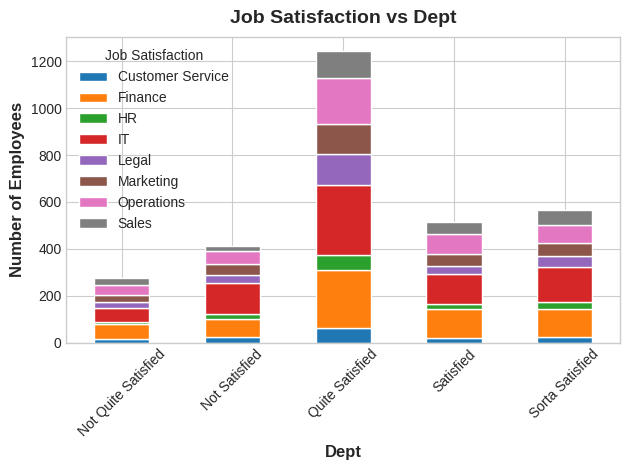

Feature: EmpType
Chi-Squared Value: 16.7160
P-Value: 0.0332
Degrees of Freedom: 8
Expected Frequencies:
 [[ 27.79181909 188.16428334  58.04389757]
 [ 41.78915863 282.93315597  87.2776854 ]
 [125.97605587 852.91985367 263.10409046]
 [ 52.13501829 352.979714   108.88526771]
 [ 57.30794812 388.00299302 119.68905886]]



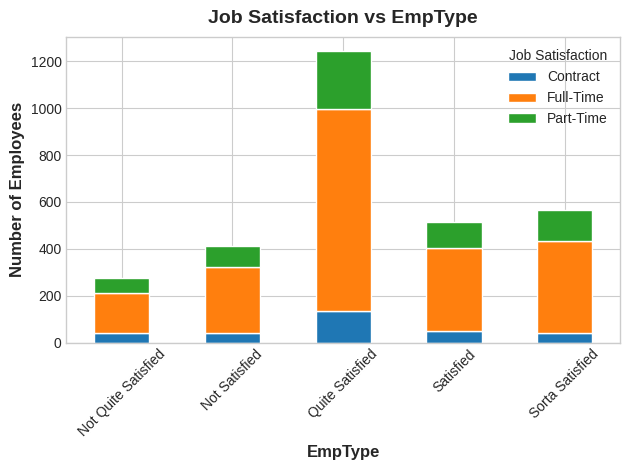

Feature: haveOT
Chi-Squared Value: 99.0693
P-Value: 0.0000
Degrees of Freedom: 4
Expected Frequencies:
 [[189.25773196  84.74226804]
 [284.57731959 127.42268041]
 [857.87628866 384.12371134]
 [355.03092784 158.96907216]
 [390.25773196 174.74226804]]



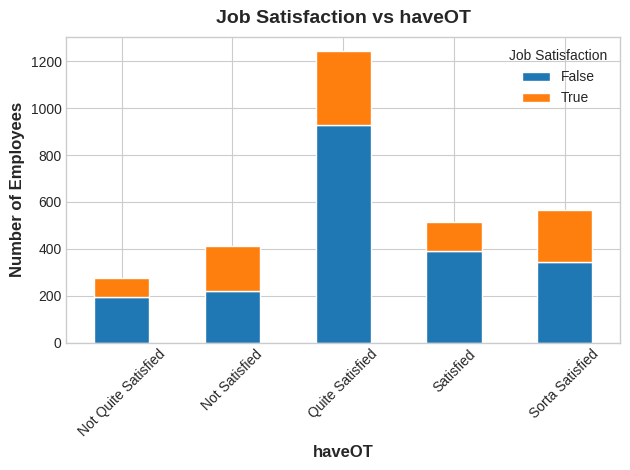

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Assuming 'df' is your DataFrame and it contains the appropriate categorical columns

# List of features to analyze
features_to_test = [
    'Workload_Binned', 'SleepHours_Binned', 'Age_Binned', 'Stress_Binned',
    'Experience_Binned', 'JobLevel', 'Gender', 'MaritalStatus', 
    'Dept', 'EmpType', 'haveOT'
]

# Prepare a dictionary to store results
chi_squared_results = {}

# Loop through each feature, create a contingency table, and perform the chi-squared test
for feature in features_to_test:
    # Create contingency table
    contingency_table = pd.crosstab(df['JobSatisfaction'], df[feature])
    
    # Perform chi-squared test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Store results
    chi_squared_results[feature] = {
        'chi2': chi2,
        'p-value': p,
        'dof': dof,
        'expected_freq': expected,
        'contingency_table': contingency_table
    }
    
    # Print the results
    print(f"Feature: {feature}")
    print(f"Chi-Squared Value: {chi2:.4f}")
    print(f"P-Value: {p:.4f}")
    print(f"Degrees of Freedom: {dof}")
    print("Expected Frequencies:\n", expected)
    print()

    # Plotting the crosstab for visualization
    contingency_table.plot(kind='bar', stacked=True)
    plt.title(f'Job Satisfaction vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Number of Employees')
    plt.xticks(rotation=45)
    plt.legend(title='Job Satisfaction')
    plt.tight_layout()
    plt.show()

# Now chi_squared_results contains all results and can be used for further analysis


Based on the Chi-Squared test results you provided, here’s an analysis of the features regarding their suitability for classification tasks:

### Features and Their Suitability:

1. **Workload_Binned**
   - **Chi-Squared Value**: 264.67
   - **P-Value**: 0.0000
   - **Conclusion**: Strongly significant. Good candidate for classification.

2. **SleepHours_Binned**
   - **Chi-Squared Value**: 111.90
   - **P-Value**: 0.0000
   - **Conclusion**: Strongly significant. Good candidate for classification.

3. **Age_Binned**
   - **Chi-Squared Value**: 25.12
   - **P-Value**: 0.6214
   - **Conclusion**: Not significant. Not a good candidate for classification.

4. **Stress_Binned**
   - **Chi-Squared Value**: 195.78
   - **P-Value**: 0.0000
   - **Conclusion**: Strongly significant. Good candidate for classification.

5. **Experience_Binned**
   - **Chi-Squared Value**: 15.79
   - **P-Value**: 0.4678
   - **Conclusion**: Not significant. Not a good candidate for classification.

6. **JobLevel**
   - **Chi-Squared Value**: 14.68
   - **P-Value**: 0.5484
   - **Conclusion**: Not significant. Not a good candidate for classification.

7. **Gender**
   - **Chi-Squared Value**: 5.19
   - **P-Value**: 0.7368
   - **Conclusion**: Not significant. Not a good candidate for classification.

8. **MaritalStatus**
   - **Chi-Squared Value**: 13.28
   - **P-Value**: 0.3494
   - **Conclusion**: Not significant. Not a good candidate for classification.

9. **Dept**
   - **Chi-Squared Value**: 38.60
   - **P-Value**: 0.0875
   - **Conclusion**: Marginally significant. Can be considered with caution.

10. **EmpType**
    - **Chi-Squared Value**: 16.72
    - **P-Value**: 0.0332
    - **Conclusion**: Significant. Good candidate for classification.

11. **haveOT**
    - **Chi-Squared Value**: 99.07
    - **P-Value**: 0.0000
    - **Conclusion**: Strongly significant. Good candidate for classification.

### Summary of Features for Classification
Based on the Chi-Squared test results, the following features are recommended for inclusion in your classification model:

- **Workload_Binned**
- **SleepHours_Binned**
- **Stress_Binned**
- **EmpType**
- **haveOT**

The features that are not significant (Age_Binned, Experience_Binned, JobLevel, Gender, and MaritalStatus) can generally be excluded from your model to avoid noise and complexity.

### Next Steps
1. **Model Development**: Use the selected features to train your classification model.
2. **Feature Engineering**: Consider interactions or transformations of features if necessary.
3. **Validation**: Assess model performance using cross-validation and metrics like accuracy, precision, recall, and F1-score.

If you have any more questions or need further assistance on this topic, feel free to ask!

Features Not Worth Including
The following features do not show a significant association with the target variable and can be excluded:

Age_Binned
Experience_Binned
JobLevel
Gender
MaritalStatus
Dept (consider context)
By focusing on the significant features, you can improve the predictive power of your model.

### Modified version 

  JobSatisfaction Workload_Binned Age_Binned Stress_Binned SleepHours_Binned  \
0  Very Satisfied               2      30-39             1                 7   
1  Very Satisfied               2      30-39             2                 7   
2  Very Satisfied               5      20-29             4                 6   
3  Very Satisfied               3      20-29             1                 7   
4  Very Satisfied               2      20-29             1                 4   

  Experience_Binned haveOT_Binned  
0              6-10           Yes  
1             11-15            No  
2               1-5           Yes  
3              6-10           Yes  
4               1-5            No  
EmpID                       int64
Gender                     object
Age                         int64
MaritalStatus              object
JobLevel                   object
Experience                  int64
Dept                       object
EmpType                    object
PhysicalActivityHours     float

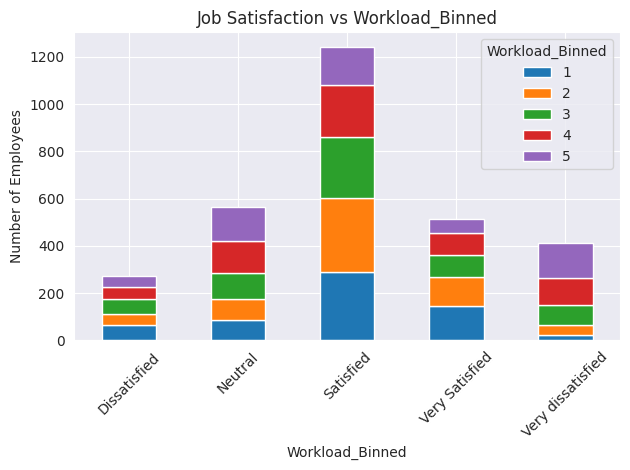

Feature: SleepHours_Binned
Chi-Squared Value: 166.7375
P-Value: 0.0000
Degrees of Freedom: 20
Expected Frequencies:
 [[  3.73594945  35.08147655  94.67442634  92.21416694  40.54871965
    7.74526106]
 [  7.70369139  72.33954107 195.22281344 190.14965081  83.61323578
   15.97106751]
 [ 16.9344862  159.01895577 429.14466245 417.99268374 183.8011307
   35.10808114]
 [  7.00831393  65.80977719 177.60093116 172.98570003  76.06584636
   14.52943133]
 [  5.61755903  52.75024942 142.35716661 138.65779847  60.97106751
   11.64615896]]



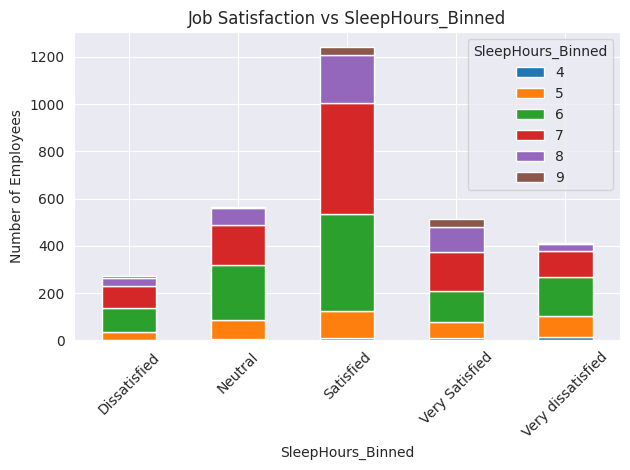

Feature: Age_Binned
Chi-Squared Value: 14.8999
P-Value: 0.5320
Degrees of Freedom: 16
Expected Frequencies:
 [[ 91.75856335  95.40339209  49.93415364  34.89923512   2.0046558 ]
 [189.21017626 196.72597273 102.96641171  71.96375125   4.13368806]
 [415.92750249 432.44895244 226.34386432 158.19288327   9.08679747]
 [172.1310276  178.96840705  93.67209844  65.46790821   3.7605587 ]
 [137.9727303  143.45327569  75.0834719   52.47622215   3.01429997]]



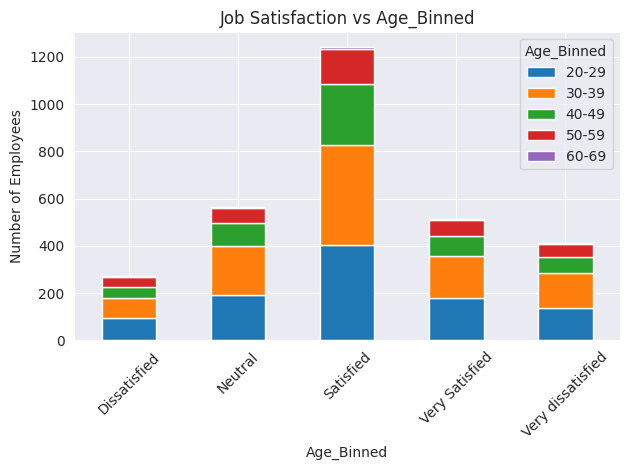

Feature: Stress_Binned
Chi-Squared Value: 195.7774
P-Value: 0.0000
Degrees of Freedom: 16
Expected Frequencies:
 [[164.01729298  48.38510143  38.36182241  16.31060858   6.92517459]
 [338.21084137  99.7721982   79.1037579   33.63318923  14.2800133 ]
 [743.46524776 219.32224809 173.88826072  73.93348853  31.39075491]
 [307.68207516  90.76621217  71.96341869  30.59727303  12.99102095]
 [246.62454273  72.75424011  57.68274027  24.52544064  10.41303625]]



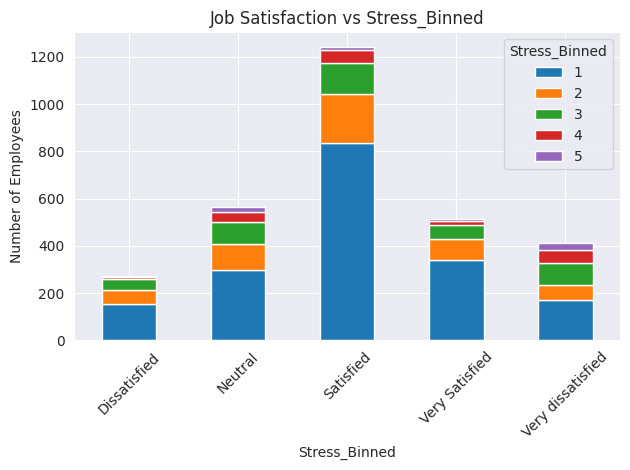

Feature: Experience_Binned
Chi-Squared Value: 20.6008
P-Value: 0.4210
Degrees of Freedom: 20
Expected Frequencies:
 [[ 92.12304623  67.24709012  53.39674094  33.71466578  17.85966079
    9.65879614]
 [189.9617559  138.66644496 110.10641836  69.52111739  36.82740273
   19.91686066]
 [417.57964749 304.82075158 242.03924177 152.82341204  80.95510476
   43.78184237]
 [172.81476555 126.14965081 100.16760891  63.24575989  33.50315929
   18.11905554]
 [138.52078484 101.11606252  80.28999002  50.6950449   26.85467243
   14.52344529]]



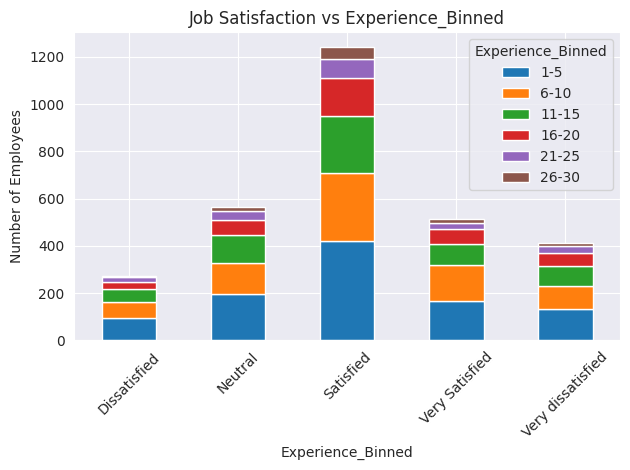

Feature: JobLevel
Chi-Squared Value: 14.6773
P-Value: 0.5484
Degrees of Freedom: 16
Expected Frequencies:
 [[ 18.4063851   54.85467243  34.62587296  69.34286664  96.77020286]
 [ 37.9547722  113.11273695  71.40006651 142.98802793 199.54439641]
 [ 83.43332225 248.64782175 156.95377453 314.3205853  438.64449618]
 [ 34.52876621 102.90256069  64.95510476 130.081144   181.53242434]
 [ 27.67675424  82.48220818  52.06518124 104.26737612 145.50848021]]



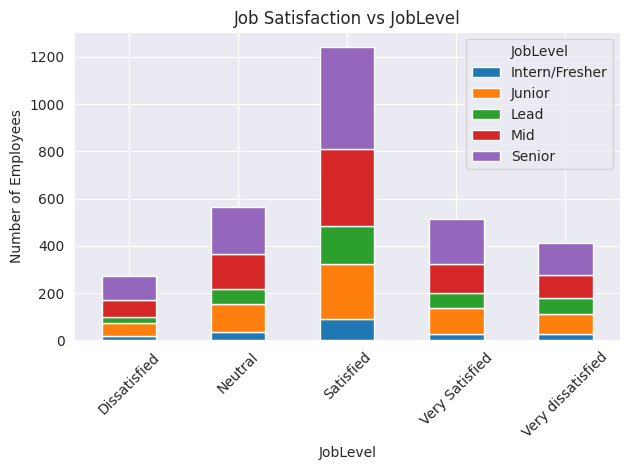

Feature: Gender
Chi-Squared Value: 5.1930
P-Value: 0.7368
Degrees of Freedom: 8
Expected Frequencies:
 [[112.35184569 138.32125042  23.32690389]
 [231.67442634 285.22447622  48.10109744]
 [509.27369471 626.98902561 105.73727968]
 [210.76222148 259.47855005  43.75922847]
 [168.93781177 207.98669771  35.07549052]]



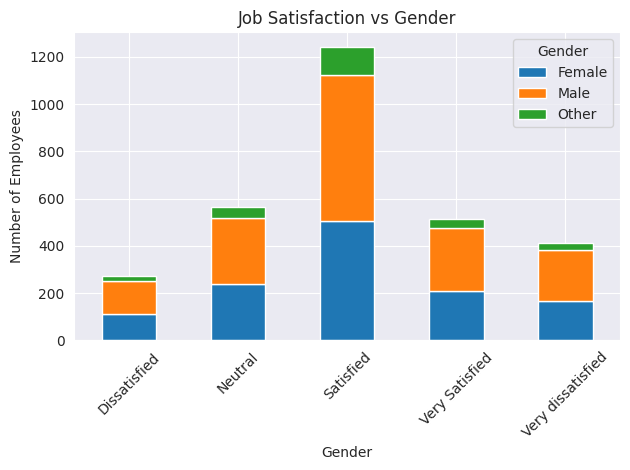

Feature: MaritalStatus
Chi-Squared Value: 13.2753
P-Value: 0.3494
Degrees of Freedom: 12
Expected Frequencies:
 [[1.71306950e+01 1.26111074e+02 1.30575989e+02 1.82241437e-01]
 [3.53242434e+01 2.60046558e+02 2.69253409e+02 3.75789824e-01]
 [7.76508148e+01 5.71642168e+02 5.91880944e+02 8.26072498e-01]
 [3.21356834e+01 2.36573329e+02 2.44949119e+02 3.41868972e-01]
 [2.57585634e+01 1.89626871e+02 1.96340539e+02 2.74027270e-01]]



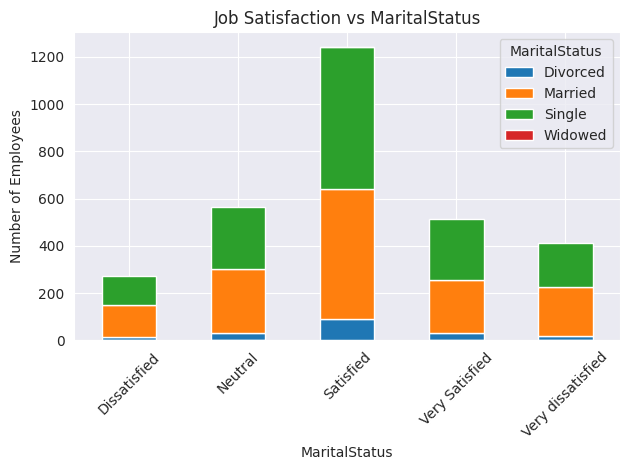

Feature: Dept
Chi-Squared Value: 38.6046
P-Value: 0.0875
Degrees of Freedom: 28
Expected Frequencies:
 [[ 13.39474559  57.40605254  12.939142    70.25407383  24.51147323
   28.61190555  41.2776854   25.60492185]
 [ 27.62055205 118.37379448  26.68107749 144.86697705  50.54373129
   58.99900233  85.11639508  52.79847024]
 [ 60.71632857 260.21283671  58.65114732 318.45094779 111.10675091
  129.69338211 187.10542069 116.0631859 ]
 [ 25.12736947 107.68872631  24.27269704 131.79048886  45.98137679
   53.67342867  77.43332225  48.03259062]
 [ 20.14100432  86.31858996  19.45593615 105.63751247  36.85666778
   43.02228134  62.06717659  38.50083139]]



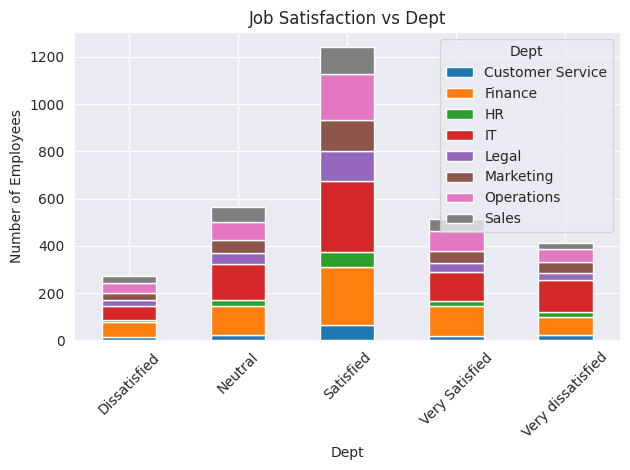

Feature: EmpType
Chi-Squared Value: 16.7160
P-Value: 0.0332
Degrees of Freedom: 8
Expected Frequencies:
 [[ 27.79181909 188.16428334  58.04389757]
 [ 57.30794812 388.00299302 119.68905886]
 [125.97605587 852.91985367 263.10409046]
 [ 52.13501829 352.979714   108.88526771]
 [ 41.78915863 282.93315597  87.2776854 ]]



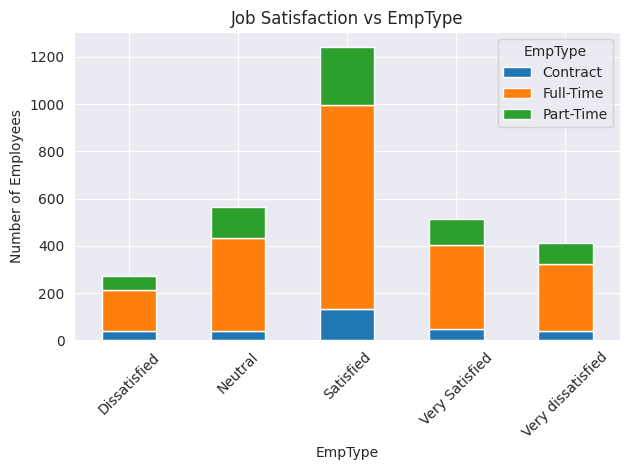

Feature: haveOT_Binned
Chi-Squared Value: 99.0693
P-Value: 0.0000
Degrees of Freedom: 4
Expected Frequencies:
 [[189.25773196  84.74226804]
 [390.25773196 174.74226804]
 [857.87628866 384.12371134]
 [355.03092784 158.96907216]
 [284.57731959 127.42268041]]



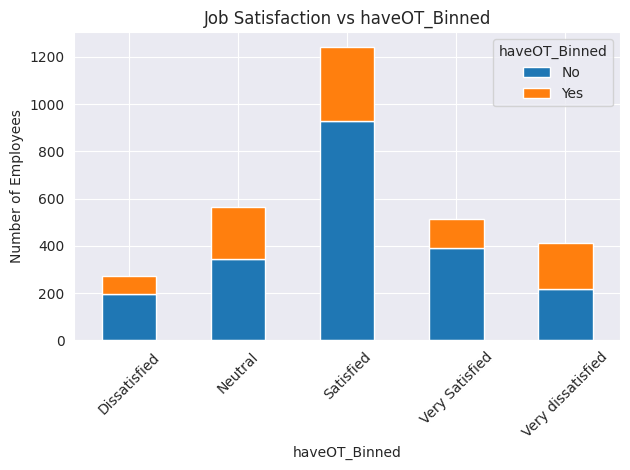

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# 1. Convert JobSatisfaction to meaningful labels
job_satisfaction_mapping = {
    1: 'Very dissatisfied',
    2: 'Dissatisfied',
    3: 'Neutral',
    4: 'Satisfied',
    5: 'Very Satisfied'
}
df['JobSatisfaction'] = df['JobSatisfaction'].map(job_satisfaction_mapping)

# 2. Define bins and bin the numerical columns
# Workload: unique values 1 to 5
df['Workload_Binned'] = pd.cut(df['Workload'], bins=[0, 1, 2, 3, 4, 5], labels=range(1, 6), right=True)

# Age: 20-29, 30-39, 40-49, 50-59, 60-69
age_bins = [20, 30, 40, 50, 60, 70]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69']
df['Age_Binned'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Stress: unique values 1 to 5
df['Stress_Binned'] = pd.cut(df['Stress'], bins=[0, 1, 2, 3, 4, 5], labels=range(1, 6), right=True)

# Sleep Hours: 0-10
sleep_hours_bins = list(range(11))  # Creates bins from 0 to 10
df['SleepHours_Binned'] = pd.cut(df['SleepHours'], bins=sleep_hours_bins, labels=sleep_hours_bins[:-1], right=False)

# Experience: 1-5, 6-10, 11-15, 16-20, 21-25, 26-30, 31-35
experience_bins = [0, 5, 10, 15, 20, 25, 30, 35]
experience_labels = ['1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35']
df['Experience_Binned'] = pd.cut(df['Experience'], bins=experience_bins, labels=experience_labels, right=False)

# HaveOT: yes or no
df['haveOT_Binned'] = df['haveOT'].map({True: 'Yes', False: 'No'})

# Print the updated DataFrame and its data types
print(df[['JobSatisfaction', 'Workload_Binned', 'Age_Binned', 
          'Stress_Binned', 'SleepHours_Binned', 'Experience_Binned', 
          'haveOT_Binned']].head())
print(df.dtypes)

# Chi-squared test
# List of features to analyze
features_to_test = [
    'Workload_Binned', 'SleepHours_Binned', 'Age_Binned', 'Stress_Binned',
    'Experience_Binned', 'JobLevel', 'Gender', 'MaritalStatus', 
    'Dept', 'EmpType', 'haveOT_Binned'
]

# Prepare a dictionary to store results
chi_squared_results = {}

# Loop through each feature, create a contingency table, and perform the chi-squared test
for feature in features_to_test:
    # Create contingency table
    contingency_table = pd.crosstab(df['JobSatisfaction'], df[feature])
    
    # Perform chi-squared test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Store results
    chi_squared_results[feature] = {
        'chi2': chi2,
        'p-value': p,
        'dof': dof,
        'expected_freq': expected,
        'contingency_table': contingency_table
    }
    
    # Print the results
    print(f"Feature: {feature}")
    print(f"Chi-Squared Value: {chi2:.4f}")
    print(f"P-Value: {p:.4f}")
    print(f"Degrees of Freedom: {dof}")
    print("Expected Frequencies:\n", expected)
    print()

    # Plotting the crosstab for visualization
    contingency_table.plot(kind='bar', stacked=True)
    plt.title(f'Job Satisfaction vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Number of Employees')
    plt.xticks(rotation=45)
    plt.legend(title=feature)
    plt.tight_layout()
    plt.show()

# Save the new features and updated JobSatisfaction to a CSV file
df[['JobSatisfaction'] + features_to_test].to_csv('processed_features_job_satisfaction.csv', index=False)


The results show the association strength between the features and job satisfaction using Chi-Squared tests. Features with a Chi-Squared value above a certain threshold and a very low p-value (often less than 0.05) indicate a significant relationship. Here's a summary of which features seem worthwhile for analysis and potential predictors of job satisfaction:

1. **Significant Features (p-value < 0.05)**:
   - **Workload_Binned**: With a Chi-Squared value of 264.67 and a p-value of 0.0000, this feature shows a strong relationship with job satisfaction. It is worthwhile to include.
   - **Stress_Binned**: This feature also has a significant Chi-Squared value (195.77) and a p-value of 0.0000, indicating a strong association.
   - **SleepHours_Binned**: A Chi-Squared value of 166.74 with a p-value of 0.0000 suggests this feature is significant.
   
2. **Non-Significant Features (p-value > 0.05)**:
   - **Age_Binned**: With a Chi-Squared value of 14.90 and a p-value of 0.5320, this feature doesn't show a strong association.
   - **Experience_Binned**: Chi-Squared value of 20.60 with a p-value of 0.4210 indicates low significance.
   - **Gender**: A p-value of 0.7368 suggests this feature is not associated with job satisfaction.
   - **JobLevel**: The p-value of 0.5484 indicates no significant relationship.
   - **MaritalStatus**: With a p-value of 0.3494, it doesn't appear to be associated with job satisfaction.
   - **Dept**: The p-value of 0.0875 is closer to significance but still above the 0.05 threshold.

Based on these results, **Workload_Binned**, **Stress_Binned**, and **SleepHours_Binned** are worthwhile features to explore further. The other features do not show strong associations with job satisfaction in this analysis.